In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('diabetes.csv')
#data.head()

bmi_data = data[data['Outcome'] == 0]['BMI']
sample_100 = bmi_data.sample(100)
sample_100.head()

200    31.0
304    21.0
760    28.4
262    32.1
420    45.3
Name: BMI, dtype: float64

In [53]:
def bootstrap_sampling(data, repetitions):
    bootstrap_means = np.empty(repetitions)
    for i in range(repetitions):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    return bootstrap_means

bootstrap_sample_means = bootstrap_sampling(sample_100, repetitions=1000)
CI_90 = np.percentile(bootstrap_sample_means, [5, 95])
print("90% Confidence Interval of mean: ",CI_90 )

90% Confidence Interval of mean:  [29.70365 31.78225]


In [54]:
bootstrap_mean = np.mean(bootstrap_sample_means)
population_mean = bmi_data.mean()
print("Bootstrap mean: ",bootstrap_mean )
print("Population_mean: ",population_mean )

Bootstrap mean:  30.728417999999998
Population_mean:  30.3042


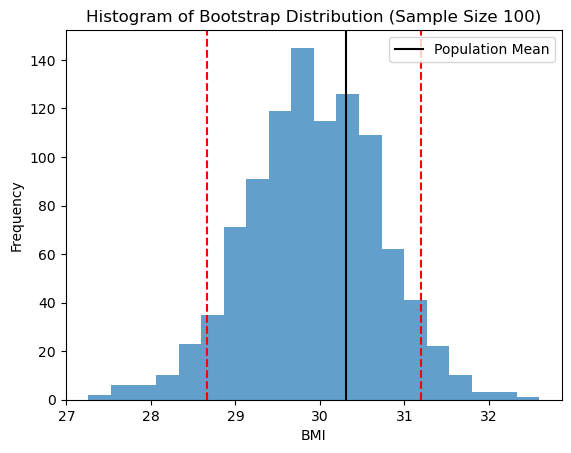

In [44]:
plt.hist(bootstrap_sample_means, bins=20, alpha=0.7)
plt.axvline(CI_90[0], color='red', linestyle='dashed')
plt.axvline(CI_90[1], color='red', linestyle='dashed')
plt.axvline(population_mean, color='black', label='Population Mean')
plt.title('Histogram of Bootstrap Distribution (Sample Size 100)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [57]:
sample_10 = bmi_data.sample(10)
bootstrap_sample_means_10 = bootstrap_sampling(sample_10, repetitions=1000)

CI_90 = np.percentile(bootstrap_sample_means_10, [5, 95])
bootstrap_mean = np.mean(bootstrap_sample_means_10)
population_mean = bmi_data.mean()
print("90% Confidence Interval of mean: ",CI_90 )
print("Bootstrap mean: ",bootstrap_mean )
print("Population_mean: ",population_mean )

90% Confidence Interval of mean:  [21.675  32.7805]
Bootstrap mean:  27.72707
Population_mean:  30.3042
